# Algorithms Exercise 1

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [2]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    s = s.lower()
    s = s.splitlines()
    s = " ".join(s)
    
    # make stop_words into a list
    if type(stop_words) == str:
        stop_words = stop_words.split(" ")
        
    #remove punctuation
    for element in punctuation:
        s = list(filter(lambda a: a!=element, list(s)))
    s = "".join(s)
    
    # at this point the puncutation and \n have been removed
    # make it a list of words
    s = s.split(" ")
    
    #filter out the empty spaces
    s = list(filter(lambda x: x!= '', s))
    s = " ".join(s)
    final = s.split(" ")

    if stop_words != None:
        for j in range(len(stop_words)):
            final = list(filter(lambda x: x!= stop_words[j], final))
    return final
    
    

In [3]:
tokenize("hello my name\nis natasha proctor!\nAnd I want to be done with this.", stop_words=["hello", "with", "this"])

['my',
 'name',
 'is',
 'natasha',
 'proctor',
 'and',
 'i',
 'want',
 'to',
 'be',
 'done']

In [4]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [5]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    r = {data[i]: data.count(data[i]) for i in range(len(data))}
    return r

In [6]:
count_words(tokenize('this and the this from and a a a'))


{'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

In [7]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [8]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    zipped = list(zip(wc.keys(), wc.values()))
    answer = sorted(zipped, key= lambda a: a[1], reverse=True)
    return answer

In [9]:
sort_word_counts({'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2})

[('a', 3), ('this', 2), ('and', 2), ('from', 1), ('the', 1)]

In [10]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [11]:
mobydick = open("mobydick_chapter1.txt", "r")

swc = sort_word_counts(count_words(tokenize(mobydick.read(), stop_words="the of and a to in is it that as")))

mobydick.close()

In [12]:
print(len(swc))

843


In [13]:
assert swc[0]==('i',43)
assert len(swc)==843

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

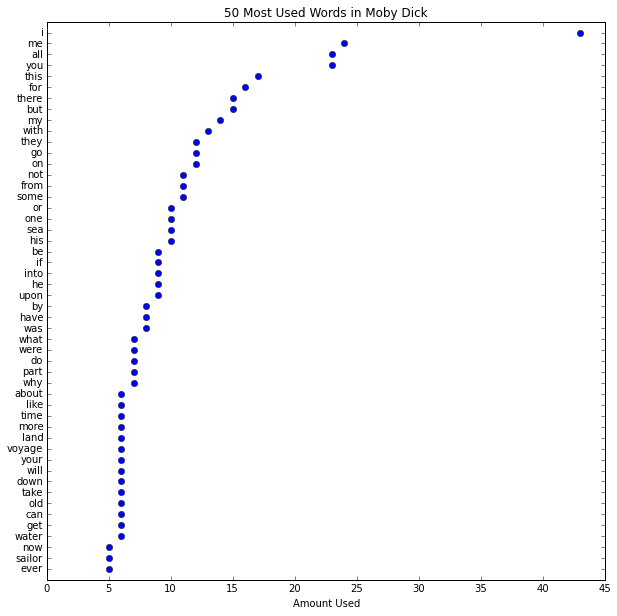

In [18]:
X = [x[1] for x in swc[0:50]]
Y = np.linspace(0,50, 50)
label = [x[0] for x in swc[0:50]]

plt.figure(figsize=(10,10))
plt.plot(X,Y, 'bo')
plt.ylim(-1, 51)
plt.xlim(0,45)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel("Amount Used")
plt.title("50 Most Used Words in Moby Dick")
plt.yticks(Y, label)
plt.show()



In [ ]:
assert True # use this for grading the dotplot